# K-Means Clustering

In [36]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [37]:
#Read csv file
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## A mall would be interested in analyzing how much a customer spends and how much they make in a year, to better recommend products, discounts, etc.

In [38]:
# Get basic statistics
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


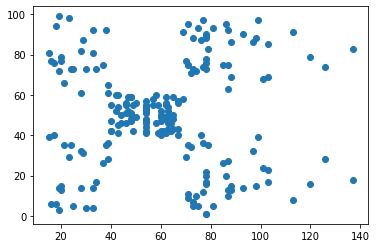

In [39]:
# See the relationship between Annual Income and Spending Score
plt.scatter(data["Annual Income (k$)"], data ["Spending Score (1-100)"])

In [40]:
# Select columns we are interested in
data_features = data.iloc[:,[3,4]].values

In [41]:
# Select number of clusters as 3
model_kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)

#Fit model and create cluster column
y_means = model_kmeans.fit_predict(data_features)
data["cluster"] = y_means

data.head()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [42]:
data['cluster'].value_counts()

0    123
2     39
1     38
Name: cluster, dtype: int64

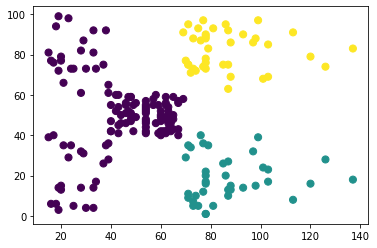

In [43]:
# Plot relationship based on clusters
plt.scatter(data["Annual Income (k$)"], data ["Spending Score (1-100)"], c= data["cluster"], s=50)

In [44]:
pd.crosstab(data['cluster'],data['Gender']) 

Gender,Female,Male
cluster,,
0,73,50
1,18,20
2,21,18


In [45]:
data.groupby('cluster')['Age', 'Annual Income (k$)',
 'Spending Score (1-100)'].mean()

/var/folders/mv/kblvrkfx5l1fk0gfbrgc57040000gn/T/ipykernel_26958/3558156246.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('cluster')['Age', 'Annual Income (k$)',


,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,40.325203,44.154472,49.829268
1,40.394737,87.000000,18.631579
2,32.692308,86.538462,82.128205


# An elbow plot shows at what value of k, the distance between the mean of a cluster and the other data points in the cluster is at its lowest.

##### Two values are of importance here — distortion and inertia. Distortion is the average of the euclidean squared distance from the centroid of the respective clusters. Inertia is the sum of squared distances of samples to their closest cluster centre.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

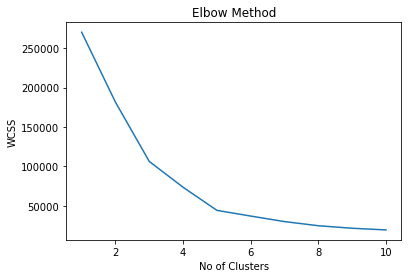

In [46]:
wcss= [] #the sum of squared distance between each point and the centroid in a cluster
for i in range(1,11):
    k_means = KMeans(n_clusters=i, init="k-means++")
    k_means.fit(data_features)
    wcss.append(k_means.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

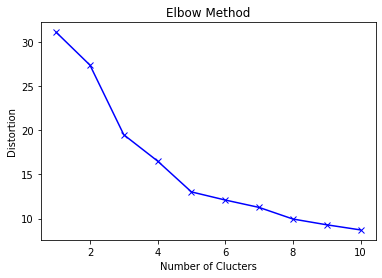

In [47]:
from scipy.spatial.distance import cdist # to calculate 
#k means determine k
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_features)
    kmeanModel.fit(data_features)
    distortions.append(sum(np.min(cdist(data_features, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data_features.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clucters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

## Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

##### Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [48]:
silhouette_score(data_features,y_means)

0.46761358158775435

### Cluster our data into 5 groups

In [49]:
# Select number of clusters as 5
model_kmeans_5 = KMeans(n_clusters=200, init='k-means++',random_state=42)
#Fit model and create cluster column
y_means_5 = model_kmeans_5.fit_predict(data_features)
data["cluster_5"] = y_means_5

silhouette_score(data_features,y_means_5)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (200). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


0.04

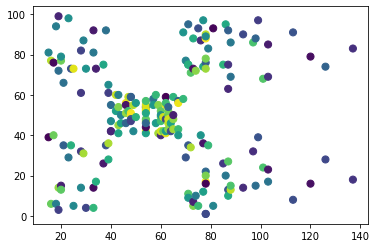

In [50]:
# Plot relationship based on clusters
plt.scatter(data["Annual Income (k$)"], data ["Spending Score (1-100)"], c= data["cluster_5"], s=50)

In [51]:
data.cluster_5.unique()

array([  2,  87, 150, 173, 151,   4,  83,  82,  37,  69, 163,  20,  18,
       152, 146,  96,  60,  71,  76,  97, 124,  48,  92, 186,  90,  39,
        34,  33, 169,  85,  41, 100, 128,  13,   6,  78, 122,  17,  14,
       116,  49,  72, 170,  36, 121,  95,  68,  93,  21, 110, 178, 158,
        84, 165, 114,  86, 113, 164,  63, 191,  10, 136, 177, 190,  58,
       192,  55,  38, 172,  91, 125, 105, 184,  31, 179, 147, 188, 194,
       117, 183, 111,   5, 137,  65,  74, 103, 129, 107, 159, 168, 153,
        23, 181, 148, 135,  98, 149, 180, 187,  40,   0, 185, 134, 108,
       145, 176, 162, 182, 154,  64,  45, 112, 161,  16, 167, 127, 133,
        56, 189, 106, 130, 101,  52,  88,  54,  67, 141, 123, 104, 171,
       143, 157, 120,  19,   9,  80, 160, 132,  47, 102,  24, 109,  99,
        11, 115,  66, 174, 195, 193, 156,  57,   1,  94,  44, 155, 166,
       131,  81,  89,   3,  32, 126,  77, 118, 144,  22,  53,  29, 119,
        59, 175,  79, 140,  73,  25,  43,  26, 138,  70,  62,  5

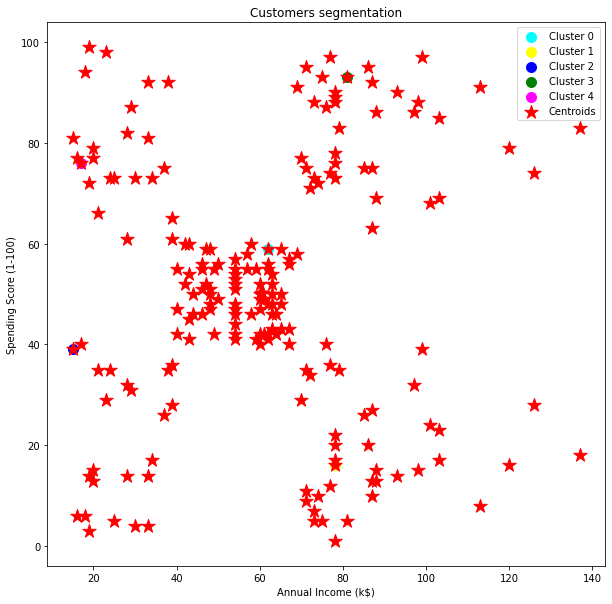

In [52]:
## Visualize the clusters
plt.figure(figsize = (10,10))
plt.scatter(data_features[y_means_5 == 0,0],data_features[y_means_5 == 0,1], s = 100, c = 'cyan',label = 'Cluster 0')
plt.scatter(data_features[y_means_5 == 1,0],data_features[y_means_5 == 1,1], s = 100, c = 'yellow',label = 'Cluster 1')
plt.scatter(data_features[y_means_5 == 2,0],data_features[y_means_5 == 2,1], s = 100, c = 'blue',label = 'Cluster 2')
plt.scatter(data_features[y_means_5 == 3,0],data_features[y_means_5 == 3,1], s = 100, c = 'green',label = 'Cluster 3')
plt.scatter(data_features[y_means_5 == 4,0],data_features[y_means_5 == 4,1], s = 100, c = 'magenta',label = 'Cluster 4')
plt.scatter(model_kmeans_5.cluster_centers_[:,0],model_kmeans_5.cluster_centers_[:,1], s = 200, c = 'red',marker='*', label = 'Centroids')
plt.title('Customers segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()